In [4]:
import pandas as pd
import seaborn as sns

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [5]:
df.head()

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"


,ID da transação,Valor da transação,Data da transação
count,30.000000,30.000000,30
mean,15.500000,325.633333,2022-01-15 12:00:00
min,1.000000,100.000000,2022-01-01 00:00:00
25%,8.250000,200.000000,2022-01-08 06:00:00
50%,15.500000,250.000000,2022-01-15 12:00:00
75%,22.750000,400.000000,2022-01-22 18:00:00
max,30.000000,913.000000,2022-01-30 00:00:00
std,8.803408,214.442579,NaN


In [7]:
def calc_outliers(column, dataframe):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = dataframe[(dataframe[column] < limite_inferior) | (dataframe[column] > limite_superior)]

    return outliers

In [15]:
calc_outliers('Valor da transação', df)

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


<AxesSubplot: xlabel='Valor da transação'>

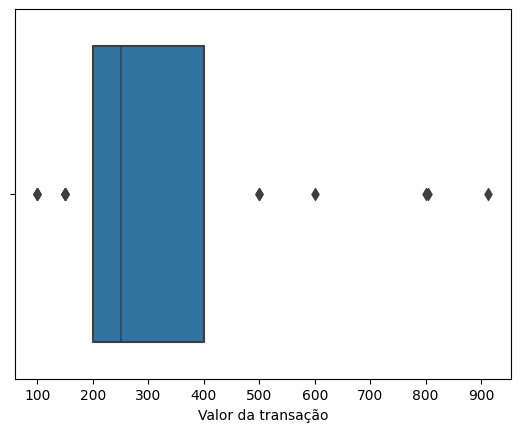

In [9]:
sns.boxenplot(x = df['Valor da transação'])